# 補間-interpolate

補間は、既知の離散データから未知のデータを求める方法です。フィッティングとは異なり、曲線がすべての既知のデータを通過することを要求します。SciPyの`interpolate`モジュールは、データに対して補間演算を行うための多くの関数を提供しています。

In [1]:
from matplotlib import pyplot as plt
import helper.matplotlib
import numpy as np
from scipy import interpolate

## 一次元補間

一次元データの補間演算は`interp1d()`で行うことができます。その呼び出し形式は以下の通りで、実際には関数ではなくクラスです：

```python
interp1d(x, y, kind='linear', ...)
```

ここで、`x`と`y`パラメータは一連の既知のデータ点であり、`kind`パラメータは補間タイプで、文字列または整数で指定できます。これは補間のBスプライン曲線の次数を示し、以下の候補値があります：

* `'zero'`、`'nearest'`：階段補間、0次のBスプライン曲線に相当します。

* `'slinear'`、`'linear'`：線形補間、すべてのサンプル点を直線で結び、1次のBスプライン曲線に相当します。`'slinear'`は拡張ライブラリの関連関数を使用して計算し、`'linear'`はPythonで書かれた関数を直接使用して計算しますが、結果は同じです。

* `'quadratic'`、`'cubic'`：2次および3次のBスプライン曲線で、より高次の曲線は整数値で直接指定できます。

`interp1d`オブジェクトは、xの範囲内の任意の点の関数値を計算できます。関数のように直接呼び出すことができ、NumPyのufunc関数と同様に配列の各要素に対して計算を行い、新しい配列を返します。

以下のプログラムは、`kind`パラメータとそれに対応する補間曲線を示しています。その結果は次のグラフに示されています。プログラムでは、同じデータに対して4つの異なる次数の補間演算をループで行います。❶まず、データ点を使用して`interp1d`オブジェクト`f`を作成し、`kind`パラメータでその次数を指定します。❷`f()`を呼び出して一連の補間結果を計算します。この例では、補間曲線を決定するデータ点は11個あり、補間後の曲線データ点は101個です。

:::{warning}
高次の`interp1d()`補間は計算量が大きいため、データ点が多い場合は、後述の`UnivariateSpline()`を使用することをお勧めします。
:::

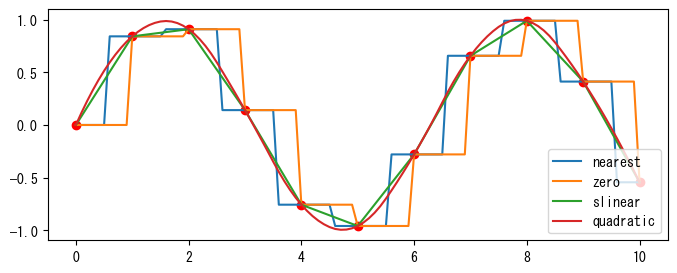

In [4]:
from scipy import interpolate

x = np.linspace(0, 10, 11)
y = np.sin(x)

xnew = np.linspace(0, 10, 101)
plt.figure(figsize=(8, 3))
plt.plot(x,y,'ro')
for kind in ['nearest', 'zero', 'slinear', 'quadratic']:
    f = interpolate.interp1d(x,y,kind=kind) #❶
    ynew = f(xnew) #❷
    plt.plot(xnew, ynew, label=str(kind))

plt.legend(loc='lower right');

### 外挿とスプライン補間

前節で紹介した`interp1d`クラスは、パラメータ`x`が増加するシーケンスであることを要求し、`x`の範囲内でのみ内挿計算を行うことができます。外挿計算、つまり`x`の範囲外のデータ点を計算することはできません。`UnivariateSpline`クラスの補間演算は`interp1d`よりも高度で、外挿とフィッティング演算をサポートしています。その呼び出し形式は以下の通りです：

```python
UnivariateSpline(x, y, w=None, bbox=[None, None], k=3, s=None)
```

* `x`、`y`はデータ点のX-Y座標を保存する配列で、`x`は増加シーケンスでなければなりません。

* `w`は各データ点に指定する重み値です。

* `k`はスプライン曲線の次数です。

* `s`は平滑化係数で、最終的に生成されるスプライン曲線が次の条件を満たすようにします：$\sum_{i=1}^{n}{(w_i \cdot (y_i-spline(x_i))^2} \leq s$ 。つまり、$s>0$の場合、スプライン曲線は必ずしも各データ点を通過しません。曲線がすべてのデータ点を通過するようにするには、`s`パラメータを0に設定する必要があります。また、`InterpolatedUnivariateSpline`クラスを使用することもできます。これは`UnivariateSpline`との唯一の違いで、すべてのデータ点を通過するため、`s`を0に設定するのと同じです。

以下のプログラムは、`UnivariateSpline`を使用してデータに対して補間、外挿、およびスプライン曲線フィッティングを行う例を示しています：

❶次のグラフ（上）に示すように、`UnivariateSpline`は外挿演算を行うことができます。入力データにX軸が10より大きい点はありませんが、X軸が0から12の範囲の補間結果を計算できます。X軸が10より大きい部分では、スプライン曲線は正弦波に似た形状を保ちますが、入力データ範囲から離れるほど誤差が大きくなるため、外挿範囲は限られています。`s`パラメータが0であるため、補間曲線はすべてのデータ点を通過します。

❷次のグラフ（下）は、`s`パラメータがゼロでない場合の結果を示しています。ノイズを含む入力データに対して、適切な`s`パラメータを選択することで、スプライン曲線がノイズのない波形に近づくことができます。これは、スプライン曲線を使用してデータに対してフィッティング演算を行うと見なすことができます。

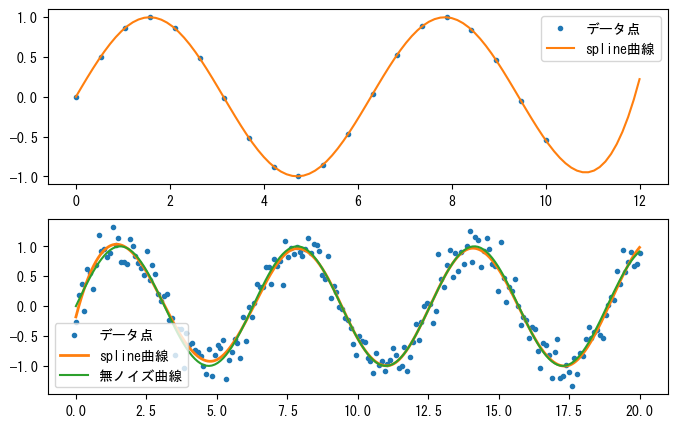

In [5]:
x1 = np.linspace(0, 10, 20)
y1 = np.sin(x1)
sx1 = np.linspace(0, 12, 100)
sy1 = interpolate.UnivariateSpline(x1, y1, s=0)(sx1) #❶

x2 = np.linspace(0, 20, 200)
y2 = np.sin(x2) + np.random.standard_normal(len(x2))*0.2
sx2 = np.linspace(0, 20, 2000)
spline2 = interpolate.UnivariateSpline(x2, y2, s=8) #❷
sy2 = spline2(sx2) 

plt.figure(figsize=(8, 5))
plt.subplot(211)
plt.plot(x1, y1, ".", label="データ点")
plt.plot(sx1, sy1, label="spline曲線")
plt.legend()

plt.subplot(212)
plt.plot(x2, y2, ".", label="データ点")
plt.plot(sx2, sy2, linewidth=2, label="spline曲線")
plt.plot(x2, np.sin(x2), label="無ノイズ曲線")
plt.legend();

曲線が3次曲線の場合、`UnivariateSpline.roots()`を使用して曲線と$y=0$の交点の横座標を計算できます。以下に、上のグラフ（下）の曲線とX軸の6つの交点の横座標を示します。

In [6]:
print(np.array_str( spline2.roots(), precision=3 ))

[ 0.104  3.157  6.31   9.431 12.564 15.697 18.906]


曲線と任意の水平線との交点を計算する必要がある場合、事前に曲線のフィッティングデータをY軸方向にシフトすることができます。ただし、複数の$y=c$水平線との交点を計算する場合、同じデータに対して複数回シフトとフィッティングを行う必要があります。

❶以下の`root_at()`は、フィッティング曲線のパラメータを直接変更することで曲線をシフトし、任意の水平線との交点を計算します。❷`roots_at()`を`UnivariateSpline`クラスのメソッドとして動的に追加します。❸複数の水平線に対して交点を求め、プロットします。その結果は次のグラフに示されています。

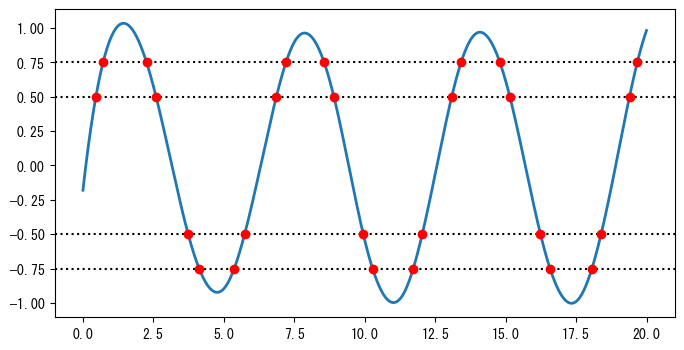

In [8]:
def roots_at(self, v): #❶
    coeff = self.get_coeffs()
    coeff -= v
    try:
        root = self.roots()
        return root
    finally:
        coeff += v

interpolate.UnivariateSpline.roots_at = roots_at #❷

plt.figure(figsize=(8, 4))
plt.plot(sx2, sy2, linewidth=2, label="spline曲線")

ax = plt.gca()
for level in [0.5, 0.75, -0.5, -0.75]:
    ax.axhline(level, ls=":", color="k")
    xr = spline2.roots_at(level) #❸
    plt.plot(xr, spline2(xr), "ro")

### パラメトリック補間

前述の補間関数は、X軸のデータが増加順に並んでいる必要があります。これは一般的な$y=f(x)$関数曲線と同様です。数学的には、パラメータ$t$と2つの関数$x=f(t), y=g(t)$を使用して、2次元平面上の曲線を定義するパラメトリック曲線もあります。例えば、円形やハート形の曲線はパラメトリック曲線です。パラメトリック曲線の補間は、`splprep()`と`splev()`を使用して行うことができます。この関数セットは高次元空間の曲線補間をサポートしていますが、ここでは2次元曲線を例にその使用方法を紹介します。

❶まず、`splprep()`を呼び出します。その最初のパラメータは、各軸上の座標を表す一連の一次元配列です。`s`パラメータは平滑化係数で、`UnivariateSpline`と同じ意味を持ちます。`splprep()`は2つのオブジェクトを返します。`tck`はタプルで、補間曲線のすべての情報を含んでいます。`t`は自動的に計算されたパラメトリック曲線のパラメータ配列です。

❷`splev()`を呼び出して補間演算を行います。その最初のパラメータは新しいパラメータ配列で、ここではtの範囲を200等分します。2番目のパラメータは`splprep()`が返す最初のオブジェクトです。実際には、パラメータ配列tは正規化された各線分の長さの累積であるため、tの範囲は0から1です。

その結果は次のグラフに示されています。図では、平滑化係数が0と1e-4の場合の補間曲線を比較しています。平滑化係数が0の場合、補間曲線はすべてのデータ点を通過します。

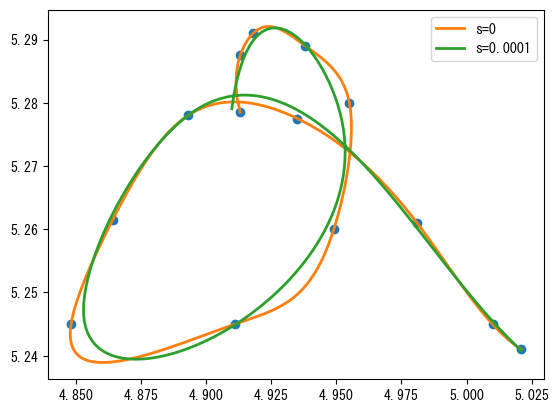

In [39]:
x = [ 4.913,  4.913,  4.918,  4.938,  4.955,  4.949,  4.911,
      4.848,  4.864,  4.893,  4.935,  4.981,  5.01 ,  5.021]

y = [ 5.2785,  5.2875,  5.291 ,  5.289 ,  5.28  ,  5.26  ,  5.245 ,
      5.245 ,  5.2615,  5.278 ,  5.2775,  5.261 ,  5.245 ,  5.241]

plt.plot(x, y, "o")

for s in (0, 1e-4):
    tck, t = interpolate.splprep([x, y], s=s) #❶
    xi, yi = interpolate.splev(np.linspace(t[0], t[-1], 200), tck) #❷
    plt.plot(xi, yi, lw=2, label=f"s={s:g}")
    
plt.legend();

### 単調補間

前述のいくつかの補間方法では、データ点の単調性を保証できません。つまり、曲線の極値がデータ点以外の場所に現れる可能性があります。`PchipInterpolator`クラス（別名`pchip`）は単調3次補間を使用し、曲線のすべての極値がデータ点上に現れることを保証します。以下のプログラムは、`pchip()`を使用してデータ点を補間し、その一次導関数曲線をプロットします。下図の導関数曲線から、すべての極値点での導関数が0であることがわかります。

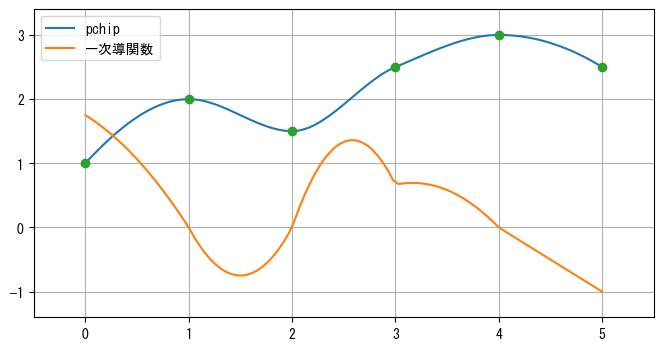

In [12]:
x = [0, 1, 2, 3, 4, 5]
y = [1, 2, 1.5, 2.5, 3, 2.5]
xs = np.linspace(x[0], x[-1], 100)
curve = interpolate.pchip(x, y)
ys = curve(xs)
dys = curve.derivative()(xs)
plt.figure(figsize=(8, 4))
plt.plot(xs, ys, label="pchip")
plt.plot(xs, dys, label="一次導関数")
plt.plot(x, y, "o")
plt.legend(loc="best")
plt.grid()
plt.margins(0.1, 0.1)

## 多次元補間

`scipy.interpolate.RegularGridInterpolator` は、規則的な（等間隔または非等間隔でも可）グリッド上のデータに対して多次元補間を行うための SciPy の関数です。1D, 2D, 3D 以上の高次元補間が可能です。以下は主な引数です。

| 引数 | 説明 |
|------|------|
| `points` | 各次元のグリッド点をリストまたはタプルで指定。`(x, y, z, ...)` のように次元ごとに配列を指定する。 |
| `values` | 各グリッド点での関数値（`points` に対応する形で多次元配列にする）。 |
| `method` | `"linear"`（デフォルト）または `"cubic"` の補間方法を指定。`"nearest"` も利用可能。 |

以下の例は、ある関数曲面のグリッド点に対して2次元補間を行います。その効果は次のグラフに示されています。左図は補間前のデータを示し、右図は補間演算の結果を示しています。

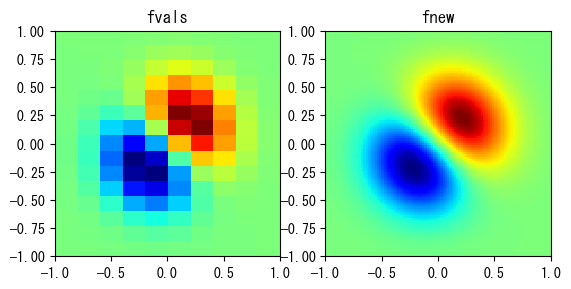

In [36]:
def func(x, y):  #❶
    return (x + y) * np.exp(-5.0 * (x**2 + y**2))

# X-Y軸を15*10のグリッドに分割
y, x = np.ogrid[-1:1:15j, -1:1:10j]  #❷
fvals = func(x, y)  # 各グリッド点での関数値を計算

# 2次元補間
interp_func = interpolate.RegularGridInterpolator( #❸
    (y.ravel(), x.ravel()), 
    fvals, method='cubic'
)

# 100*100のグリッド上で補間を計算
Ynew, Xnew = np.ogrid[-1:1:100j, -1:1:100j]
fnew = interp_func((Xnew, Ynew))  #❹

plt.subplot(121)
plt.imshow(fvals, extent=[-1,1,-1,1], cmap=plt.cm.jet, interpolation='nearest', origin="lower")
plt.title("fvals")
plt.subplot(122)
plt.imshow(fnew, extent=[-1,1,-1,1], cmap=plt.cm.jet, interpolation='nearest', origin="lower")
plt.title("fnew")
plt.show()

❶`func`は、曲面の各点の高さを計算する関数です。❷X軸とY軸が-1から1の範囲で、サイズが$15 \times 10$の等間隔グリッド上の各点の高さを計算します。得られる2次元配列`fvals`の第0軸はY軸に対応し、第1軸はX軸に対応します。❸グリッド上の各点のX、Y、Z軸の座標を使用して`RegularGridInterpolator`オブジェクトを作成します。ここでは3次補間曲面を使用します。❹`RegularGridInterpolator`オブジェクトは関数のように呼び出すことができ、より密なグリッドでの補間曲面の高さを計算するために使用します。ここでのパラメータは、`ogrid`を使用してグリッド座標配列を作成します。

### griddata

`interp2d`クラスはグリッド形状のサンプル値に対してのみ補間演算を行います。ランダムに散らばったサンプル点に対して補間を行う必要がある場合は、`griddata()`を使用できます。その呼び出し形式は以下の通りです：

```python
griddata(points, values, xi, method='linear', fill_value=nan)
```
    
ここで、`points`はK次元空間内の座標を表し、形状が`(N, k)`の配列または`k`個の配列のシーケンスであり、`N`はデータ点の数です。`values`は`points`内の各点に対応する値です。`xi`は補間演算を行う座標で、形状は`(M, k)`です。`method`には3つのオプションがあります：`'nearest'`、`'linear'`、`'cubic'`で、それぞれ0次、1次、3次補間に対応します。

以下は`griddata()`のデモプログラムで、その出力は次のグラフに示されています。左図は`'nearest'`アルゴリズムに対応し、平面上の各点は最も近いサンプル点のデータで塗りつぶされます。そのため、図は多くの同じ色のブロックで構成されています。`'linear'`と`'cubic'`アルゴリズムは、サンプル点が構成する凸包領域内でのみ補間を行い、領域外は`fill_value`で塗りつぶされます。中図と右図の白い領域は、補間の凸包領域外です。

:::{warning}
`griddata()`はユークリッド距離を使用して補間を計算します。K次元空間内の各次元の値の範囲が大きく異なる場合は、データを正規化してから`griddata()`を使用して補間演算を行う必要があります。
:::

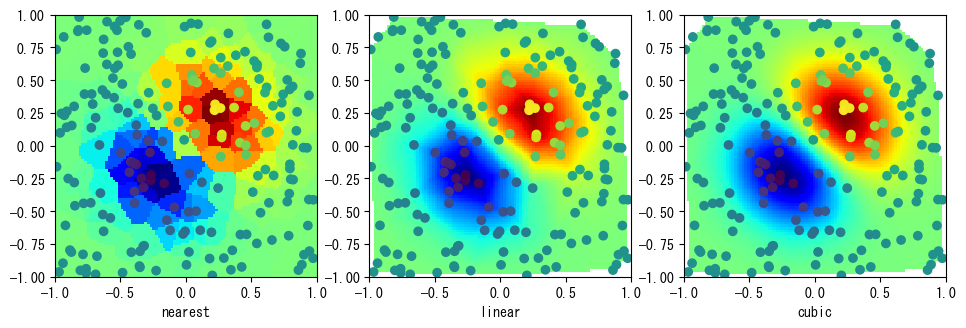

In [16]:
# ランダムなN個の点の座標と、それらの点に対応する関数値を計算します
N = 200
np.random.seed(42)
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)
z = func(x, y)

yg, xg = np.mgrid[-1:1:100j, -1:1:100j]
xi = np.c_[xg.ravel(), yg.ravel()]

methods = 'nearest', 'linear', 'cubic'

zgs = [interpolate.griddata((x, y), z, xi, method=method).reshape(100, 100) 
    for method in methods]

fig, axes = plt.subplots(1, 3, figsize=(11.5, 3.5))

for ax, method, zg in zip(axes, methods, zgs):
    ax.imshow(zg, extent=[-1,1,-1,1], cmap=plt.cm.jet, interpolation='nearest', origin="lower")
    ax.set_xlabel(method)
    ax.scatter(x, y, c=z)

### 放射基底関数補間

放射基底関数（radial basis function）補間アルゴリズムも、高次元のランダムに散らばった点の補間に使用できます。放射基底関数とは、特定の点との距離のみに関数値が依存する関数$\phi(\left\| \mathbf{x} - \mathbf{x}_i \right\|)$のことで、$\mathbf{x}_i$は与えられたサンプル点の座標です。これらの$\phi$関数を使用して、N次元空間内の関数を近似できます：

$$y(\mathbf{x}) = \sum_{i=1}^N w_i \, \phi(\|\mathbf{x} - \mathbf{x}_i\|)$$


RBFを理解しやすくするために、まず1次元補間の例を見てみましょう。その結果は次のグラフに示されています。図には、3つの$\phi$関数に対応する補間曲線が表示されています：`multiquadric`、`gaussian`、`linear`です。

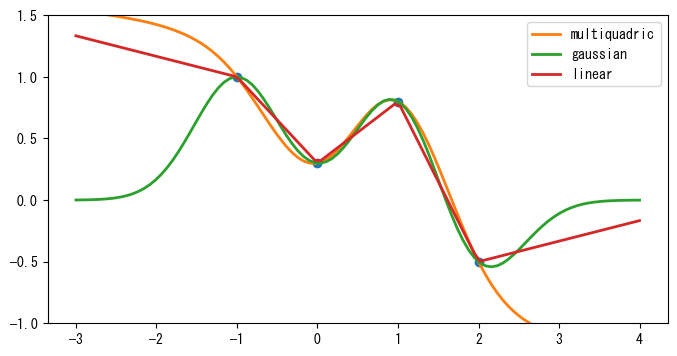

In [18]:
from scipy.interpolate import Rbf

x1 = np.array([-1, 0, 2.0, 1.0])
y1 = np.array([1.0, 0.3, -0.5, 0.8])

funcs = ['multiquadric', 'gaussian', 'linear']
nx = np.linspace(-3, 4, 100)
rbfs = [Rbf(x1, y1, function=fname) for fname in funcs] #❶
rbf_ys = [rbf(nx) for rbf in rbfs] #❷

plt.figure(figsize=(8, 4))
plt.plot(x1, y1, "o")
for fname, ny in zip(funcs, rbf_ys):
    plt.plot(nx, ny, label=fname, lw=2)

plt.ylim(-1.0, 1.5)
plt.legend();

❶サンプル点を表す`x`と`y`配列を使用して`Rbf`オブジェクトを作成し、`function`パラメータで使用する放射基底関数を指定します。❷`Rbf`オブジェクトは関数のように呼び出すことができ、`nx`を横座標とする補間曲線の値を計算するために使用します。

`Rbf`オブジェクトの`nodes`属性は$w_i$係数を保存します：

In [19]:
for fname, rbf in zip(funcs, rbfs):
    print(fname, rbf.nodes)

multiquadric [-0.88822885  2.17654513  1.42877511 -2.67919021]
gaussian [ 1.00321945 -0.02345964 -0.65441716  0.91375159]
linear [-0.26666667  0.6         0.73333333 -0.9       ]


以下のプログラムは2次元放射基底関数補間のデモンストレーションで、その効果は次のグラフに示されています：

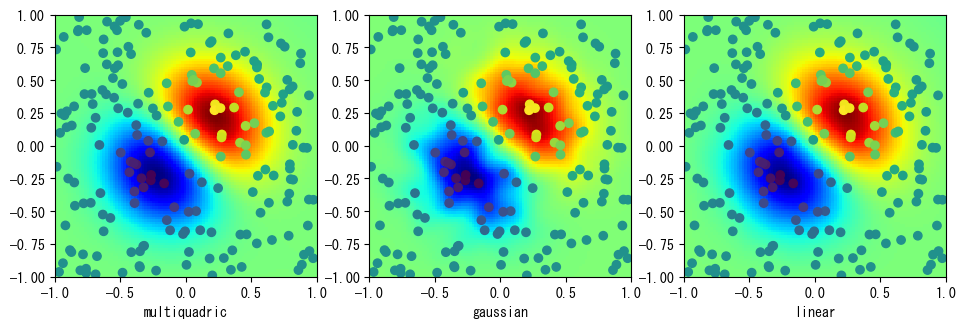

In [21]:
rbfs = [Rbf(x, y, z, function=fname) for fname in funcs]
rbf_zg = [rbf(xg, yg).reshape(xg.shape) for rbf in rbfs]

fig, axes = plt.subplots(1, 3, figsize=(11.5, 3.5))
for ax, fname, zg in zip(axes, funcs, rbf_zg):
    ax.imshow(zg, extent=[-1,1,-1,1], cmap=plt.cm.jet, interpolation='nearest', origin="lower")
    ax.set_xlabel(fname)
    ax.scatter(x, y, c=z)

一部の放射基底関数は、`epsilon`パラメータを使用してその作用範囲を指定できます。この値が大きいほど、各補間点の作用範囲が広くなり、得られる曲面はより滑らかになります。以下のコードは、`gaussian`放射基底関数の`epsilon`パラメータと補間結果の関係を示しています：

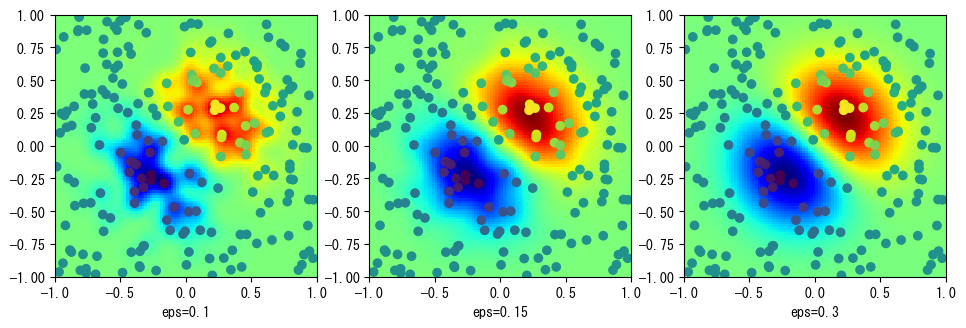

In [23]:
epsilons = 0.1, 0.15, 0.3
rbfs = [Rbf(x, y, z, function="gaussian", epsilon=eps) for eps in epsilons]
zgs = [rbf(xg, yg).reshape(xg.shape) for rbf in rbfs]

fig, axes = plt.subplots(1, 3, figsize=(11.5, 3.5))
for ax, eps, zg in zip(axes, epsilons, zgs):
    ax.imshow(zg, extent=[-1,1,-1,1], cmap=plt.cm.jet, interpolation='nearest', origin="lower")
    ax.set_xlabel("eps=%g" % eps)
    ax.scatter(x, y, c=z)